In [21]:
import time
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

## Load encodings csv

In [59]:
filepath = './data/encodings.csv'
df = pd.read_csv(filepath, header=0)
print(df.shape)
df.head()

(37, 769)


,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat759,feat760,feat761,feat762,feat763,feat764,feat765,feat766,feat767,text
0,0.406575,-0.258641,0.236082,-0.432769,-0.309956,0.098396,0.302093,-0.013579,-0.008777,-0.194293,...,0.205077,-0.055647,-0.126152,-0.164960,-0.285388,0.726041,0.173940,0.215128,0.251552,enabled
1,0.369948,-0.311301,0.242643,-0.328436,-0.199999,0.102750,0.674942,-0.072835,-0.146993,-0.249085,...,0.185151,-0.058680,-0.300947,0.122159,0.365826,0.503697,0.080786,0.479026,0.034101,based
2,0.947154,-0.434965,0.202509,-0.430142,0.130879,0.393260,0.871038,0.174279,-0.334923,-0.477715,...,0.217229,-0.215446,-0.210279,0.354309,-0.241601,0.762208,0.064532,0.014638,0.179925,see
3,0.138808,-0.714930,0.235809,-0.724609,-0.301706,0.473380,-0.081698,-0.129914,0.281354,-0.581617,...,0.342833,-0.273074,0.261710,0.032725,0.526926,-0.528162,0.571389,-0.246702,0.209911,if
4,0.418549,-0.376002,0.110142,-0.468131,-0.010564,0.093311,0.237861,-0.485930,-0.101826,-0.784916,...,0.351709,-0.342584,0.401498,0.174678,-0.136397,0.455095,0.314149,0.110564,0.103528,the


# PCA

In [61]:
data = df.loc[:, df.columns != 'text'].values

pca = PCA(n_components=3, random_state = 42)
pca_result = pca.fit_transform(data)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.1199196  0.08858447 0.07844081]


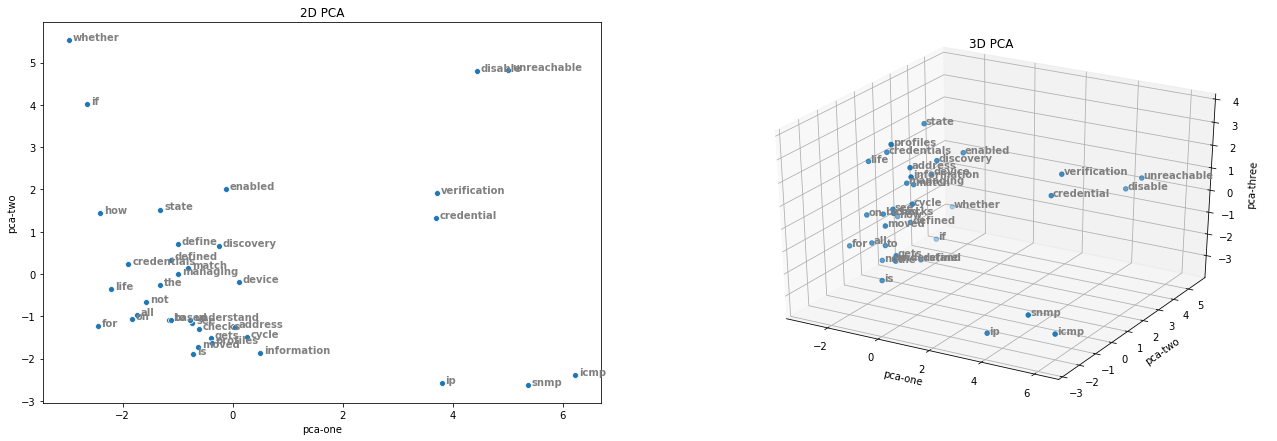

In [62]:
fig = plt.figure(figsize=(22,7))

# PCA in 2D
ax1 = fig.add_subplot(1, 2, 1)
sns.scatterplot(
    x = df['pca-one'], 
    y = df['pca-two'])
ax1.set_title("2D PCA")

# PCA in 3D
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(
    xs=df["pca-one"], 
    ys=df["pca-two"], 
    zs=df["pca-three"],
    cmap='tab10')
ax2.set_title("3D PCA")
ax2.set_xlabel('pca-one')
ax2.set_ylabel('pca-two')
ax2.set_zlabel('pca-three')

# Annotate points with labels
for line in df.index:
    ax1.text(df.loc[line,"pca-one"]+0.07, 
             df.loc[line,"pca-two"], 
             df.loc[line,"text"], 
             horizontalalignment='left', 
             size='medium', 
             color='gray', 
             weight='semibold')
    ax2.text(df.loc[line,"pca-one"]+0.07, 
             df.loc[line,"pca-two"], 
             df.loc[line,"pca-three"], 
             df.loc[line,"text"], 
             horizontalalignment='left', 
             size='medium', 
             color='gray', 
             weight='semibold')

fig.show()

# t-SNE

In [79]:
data = df.loc[:, df.columns != 'text'].values
tsne = TSNE(n_components=3, perplexity=40, n_iter=1500, learning_rate = 1000, random_state = 42, verbose=1)
tsne_results = tsne.fit_transform(data)

df['tsne-one'] = tsne_results[:,0]
df['tsne-two'] = tsne_results[:,1]
df['tsne-three'] = tsne_results[:,2]

[t-SNE] Computing 36 nearest neighbors...
[t-SNE] Indexed 37 samples in 0.000s...
[t-SNE] Computed neighbors for 37 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 37 / 37
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.164242
[t-SNE] KL divergence after 1500 iterations: 1.240446


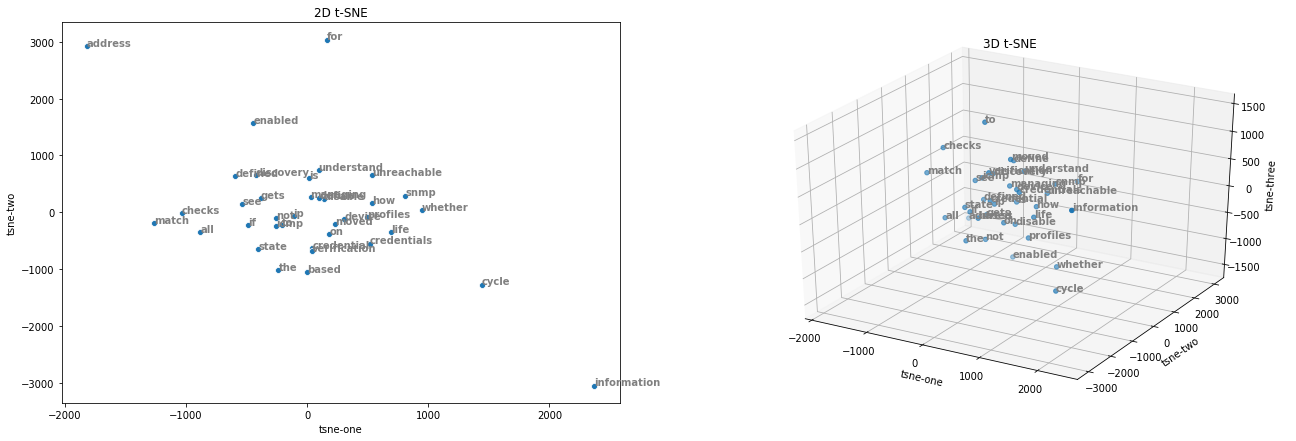

In [80]:
fig = plt.figure(figsize=(22,7))

# t-SNE in 2D
ax1 = fig.add_subplot(1, 2, 1)
sns.scatterplot(
    x = df['tsne-one'], 
    y = df['tsne-two'])
ax1.set_title("2D t-SNE")

# t-SNE in 3D
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(
    xs=df["tsne-one"], 
    ys=df["tsne-two"], 
    zs=df["tsne-three"],
    cmap='tab10')
ax2.set_title("3D t-SNE")
ax2.set_xlabel('tsne-one')
ax2.set_ylabel('tsne-two')
ax2.set_zlabel('tsne-three')

# Annotate points with labels
for line in df.index:
    ax1.text(df.loc[line,"tsne-one"]+0.07, 
             df.loc[line,"tsne-two"], 
             df.loc[line,"text"], 
             horizontalalignment='left', 
             size='medium', 
             color='gray', 
             weight='semibold')
    ax2.text(df.loc[line,"tsne-one"]+0.07, 
             df.loc[line,"tsne-two"], 
             df.loc[line,"tsne-three"], 
             df.loc[line,"text"], 
             horizontalalignment='left', 
             size='medium', 
             color='gray', 
             weight='semibold')

fig.show()

# Comparisons between PCA and t-SNE

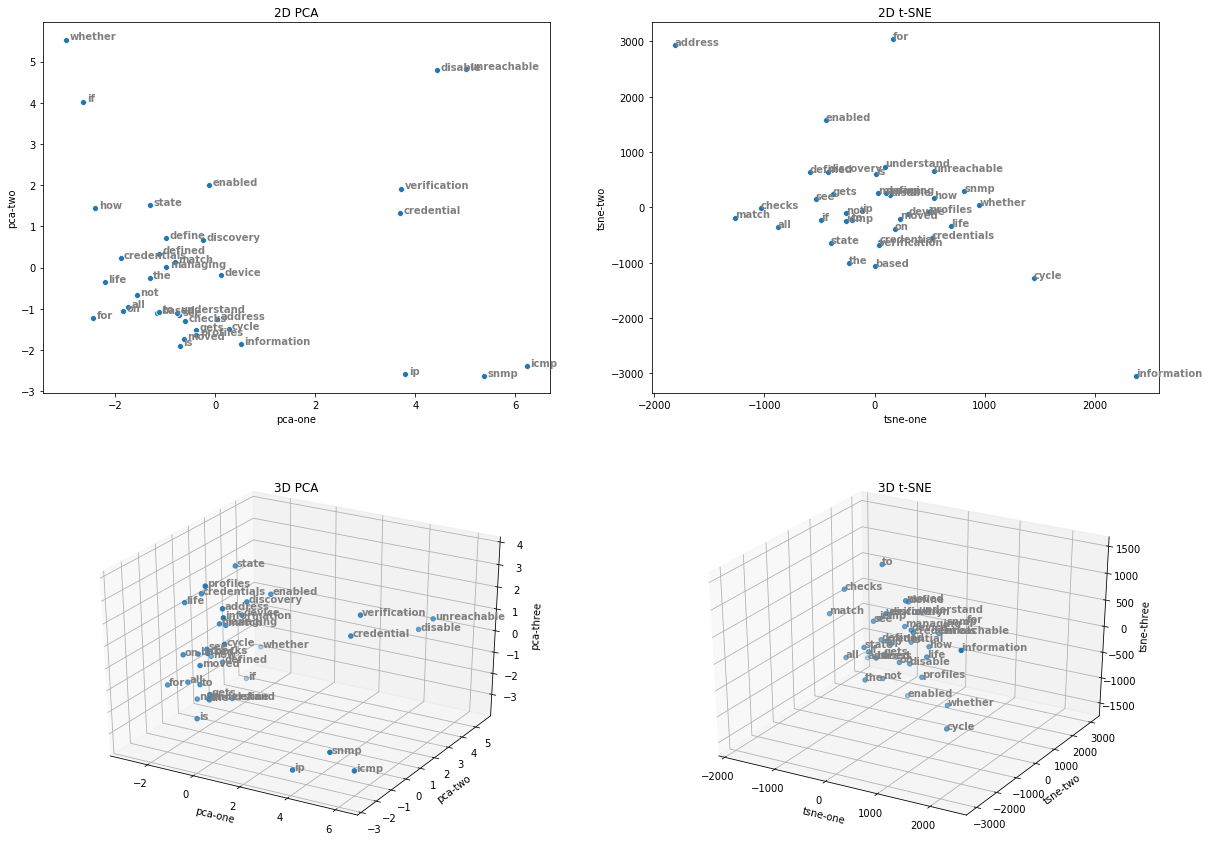

In [87]:
fig = plt.figure(figsize=(20,15))

# PCA in 2D
ax1 = fig.add_subplot(2, 2, 1)
sns.scatterplot(
    x = df['pca-one'], 
    y = df['pca-two'])
ax1.set_title("2D PCA")

# t-SNE in 2D
ax2 = fig.add_subplot(2, 2, 2)
sns.scatterplot(
    x = df['tsne-one'], 
    y = df['tsne-two'])
ax2.set_title("2D t-SNE")


# PCA in 3D
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
ax3.scatter(
    xs=df["pca-one"], 
    ys=df["pca-two"], 
    zs=df["pca-three"],
    cmap='tab10')
ax3.set_title("3D PCA")
ax3.set_xlabel('pca-one')
ax3.set_ylabel('pca-two')
ax3.set_zlabel('pca-three')

# t-SNE in 3D
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
ax4.scatter(
    xs=df["tsne-one"], 
    ys=df["tsne-two"], 
    zs=df["tsne-three"],
    cmap='tab10')
ax4.set_title("3D t-SNE")
ax4.set_xlabel('tsne-one')
ax4.set_ylabel('tsne-two')
ax4.set_zlabel('tsne-three')

# Annotate points with labels
for line in df.index:
    ax1.text(df.loc[line,"pca-one"]+0.07, 
             df.loc[line,"pca-two"], 
             df.loc[line,"text"], 
             horizontalalignment='left', 
             size='medium', 
             color='gray', 
             weight='semibold')
    ax2.text(df.loc[line,"tsne-one"]+0.07, 
             df.loc[line,"tsne-two"], 
             df.loc[line,"text"], 
             horizontalalignment='left', 
             size='medium', 
             color='gray', 
             weight='semibold')
    ax3.text(df.loc[line,"pca-one"]+0.07, 
             df.loc[line,"pca-two"], 
             df.loc[line,"pca-three"], 
             df.loc[line,"text"], 
             horizontalalignment='left', 
             size='medium', 
             color='gray', 
             weight='semibold')
    ax4.text(df.loc[line,"tsne-one"]+0.07, 
             df.loc[line,"tsne-two"], 
             df.loc[line,"tsne-three"], 
             df.loc[line,"text"], 
             horizontalalignment='left', 
             size='medium', 
             color='gray', 
             weight='semibold')

fig.show()

# Combining PCA and t-SNE

In [89]:
data = df.loc[:, df.columns != 'text'].values

pca_50 = PCA(n_components=50, random_state = 42)
pca_result_50 = pca_50.fit_transform(data)

print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

ValueError: n_components=50 must be between 0 and min(n_samples, n_features)=37 with svd_solver='full'